<a href="https://colab.research.google.com/github/willbastosferreira/estatistica/blob/main/Estat_basica_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Básica para Data Sicence

 - Conceitos básicos

## 1 Dataset do Projeto

#### Pesquisa Nacional por Amostra de domicílios - 2015
*O sistema de pesquisas domiciliares, implantado progressivamente no Brasil a partir de 1967, com a criação da Pesquisa Nacional por Amostra de Domicílios - PNAD, tem como finalidade a produção de informações básicas para o estudo do desenvolvimento socioeconômico do País. Trata-se de um sistema de pesquisas por amostra de domicílios que, por ter propósitos múltiplos, investiga diversas característicassocioeconômicas e demográficas, umas de caráter permanente nas pesquisas, como as características gerais da população, de educação, trabalho, rendimento e habitação, e outras com periodicidade variável, como as características sobre migração, fecundidade, nupcialidade,saúde, segurança alimentar e outros temas que são incluídos no sistema de acordo com as necessidades de informação para o País.*



In [ ]:
## importe as bibliotecas

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm

In [ ]:
#importe os dados

os.chdir('C:\\Users\\basfe\\DataspellProjects\\Learning Data Science  - Will\Data')
dados = pd.read_csv('dados.csv')
dados.head()

#C:\Users\basfe\DataspellProjects\Learning Data Science  - Will\Data

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
# decodifique os registros utilzando dicionarios

sexo = {
    0:'Masculino',
    1:'Feminino'
}

cor = {
    0:'Indígena',
    2:'Branca',
    4:'Preta',
    6:'Amarela',
    8:'Parda',
    9:'Sem declaração'
}

anos_de_estudo = {
    1:'Sem instrução e menos de 1 ano',
    2:'1 anos',
    3:'2 anos',
    4:'3 anos',
    5:'4 anos',
    6:'5 anos',
    7:'6 anos',
    8:'7 anos',
    9:'8 anos',
    10:'9 anos',
    11:'10 anos',
    12:'11 anos',
    13:'12 anos',
    14:'13 anos',
    15:'14 anos',
    16:'15 anos ou mais',
    17:'Não determinados',
}

uf = {
    11:'Rondônia',
    12:'Acre',
    13:'Amazonas',
    14:'Roraima',
    15:'Pará',
    16:'Amapá',
    17:'Tocantis',
    21:'Maranhão',
    22:'Piauí',
    23:'Ceará',
    24:'Rio Grande do Norte',
    25:'Paraíba',
    26:'Pernambuco',
    27:'Alagoas',
    28:'Sergipe',
    29:'Bahia',
    31:'Minas Gerais',
    32:'Espírito Santo',
    33:'Rio de Janeiro',
    35:'São Paulo',
    41:'Paraná',
    42:'Santa Catarina',
    43:'Rio Grande do Sul',
    50:'Mato Grosso do Sul',
    51:'Mato Grosso',
    52:'Goiás',
    53:'Distrito Federal'
}

In [ ]:
# crie dataframes a partir dos dicionarios

df_sexo = pd.DataFrame.from_dict(data=sexo, orient='index').rename(columns={0:'Sexo'})
df_anos_de_estudo = pd.DataFrame.from_dict(data=anos_de_estudo, orient='index').rename(columns={0:'Idade'})
df_uf = pd.DataFrame.from_dict(data=uf, orient='index').rename(columns={0:'Estado'})

In [ ]:
df_sexo

,Sexo
0,Masculino
1,Feminino


In [ ]:
df_anos_de_estudo

,Idade
1,Sem instrução e menos de 1 ano
2,1 anos
3,2 anos
4,3 anos
5,4 anos
6,5 anos
7,6 anos
8,7 anos
9,8 anos
10,9 anos


In [ ]:
df_uf

,Estado
11,Rondônia
12,Acre
13,Amazonas
14,Roraima
15,Pará
16,Amapá
17,Tocantis
21,Maranhão
22,Piauí
23,Ceará


 # 1 Distribuição de Frequências

# 1.1 Distribuição de Frequências para Variáveis Quantitativas

In [ ]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [ ]:
dados['Sexo'].value_counts(normalize=True) # em percentual

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [ ]:
# incorpore em um data frame

dist_freq_qualitativas = dados['Sexo'].value_counts()
freq_percentual_qualitativas = dados['Sexo'].value_counts(normalize=True) * 100


In [ ]:
freq_percentual_qualitativas

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [ ]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize=True) * 100

In [ ]:
dist_freq_qualitativas01 = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [ ]:
dist_freq_qualitativas01

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [ ]:
dist_freq_qualitativas01.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_qualitativas01.rename_axis('Sexo', axis = 'columns', inplace=True)
dist_freq_qualitativas01

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [ ]:
dist_freq_qualitativas.rename(index={0:'Masculino', 1:'Feminino'}, inplace=True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 0, inplace=True)

In [ ]:
dist_freq_qualitativas

Sexo
Masculino    53250
Feminino     23590
Name: Sexo, dtype: int64

In [ ]:
# Outro método

sexo = {0: 'Masculino', 1:'Feminino'}

cor = {0:'Indígena',
       2:'Branca',
       4:'Preta',
       6:'Amarela',
       8:'Parda',
       9:'Se declaração'}

In [ ]:
freq = pd.crosstab(dados.Sexo, dados.Cor) # pesquise sobre crosstab
freq.rename(columns= cor, inplace=True)
freq.rename(index=sexo, inplace=True)
freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
# dados cruzados com renda

freq_renda = pd.crosstab(dados.Sexo,
                                dados.Cor,
                                 aggfunc = 'mean',
                         values = dados.Renda)
freq_renda.rename(columns= cor, inplace=True)
freq_renda.rename(index=sexo, inplace=True)
freq_renda

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


# 1.2 Distribuição de Frequências para Variáveis Quantitativas (Classes Personalizadas)


In [ ]:
dados.Renda.min()

0

In [ ]:
dados.Renda.max()

200000

In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000] # limites das rendas de cada classe

In [ ]:
labels = ['E','D','C','B', 'A']

In [ ]:
# Crie uma tablea de frequencias com o metodo pd.cut ## pesquise depois

pd.cut(x = dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
freq = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins=classes,
           labels=labels,
           include_lowest=True)
)
freq

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [ ]:
freq_percentual= pd.value_counts(
    pd.cut(x = dados.Renda,
           bins=classes,
           labels=labels,
           include_lowest=True),
    normalize=True) * 100
freq_percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [ ]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': freq, 'Porcentagem (%)': freq_percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [ ]:
dist_freq_qualitativas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [ ]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência': freq, 'Porcentagem (%)': freq_percentual})
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [ ]:
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


# Definindo o numero de classe atraves de formulas

# regra de sturges
# k = 1 + 10/3 * log10(n)



In [ ]:
n = dados.shape
n

(76840, 7)

In [ ]:
n[0]

76840

In [ ]:
n = dados.shape[0]
n

76840

In [ ]:
k = 1 + (10/3) * np.log10(n)

In [ ]:
k

17.285291187298853

In [ ]:
k = int(k.__round__(0))
k

17

## Criar tabela de frequências

In [ ]:
freq = pd.value_counts(
    pd.cut(x = dados.Renda,
    bins=17,
    include_lowest=True))
sorted(freq)
freq

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

In [ ]:
classes = pd.cut(x = dados.Renda,
    bins=17,
    include_lowest=True)
classes

0        (-200.001, 11764.706]
1        (-200.001, 11764.706]
2        (-200.001, 11764.706]
3        (-200.001, 11764.706]
4        (-200.001, 11764.706]
                 ...          
76835    (-200.001, 11764.706]
76836    (-200.001, 11764.706]
76837    (-200.001, 11764.706]
76838    (-200.001, 11764.706]
76839    (-200.001, 11764.706]
Name: Renda, Length: 76840, dtype: category
Categories (17, interval[float64, right]): [(-200.001, 11764.706] < (11764.706, 23529.412] < (23529.412, 35294.118] < (35294.118, 47058.824] ... (152941.176, 164705.882] < (164705.882, 176470.588] < (176470.588, 188235.294] < (188235.294, 200000.0]]

In [ ]:
dist_freq_qualitativas = pd.DataFrame({'Classes': classes, 'Renda': dados.Renda})
sorted(classes)
dist_freq_qualitativas

,Classes,Renda
0,"(-200.001, 11764.706]",800
1,"(-200.001, 11764.706]",1150
2,"(-200.001, 11764.706]",880
3,"(-200.001, 11764.706]",3500
4,"(-200.001, 11764.706]",150
...,...,...
76835,"(-200.001, 11764.706]",812
76836,"(-200.001, 11764.706]",1500
76837,"(-200.001, 11764.706]",1300
76838,"(-200.001, 11764.706]",1500


In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
    bins=17,
    include_lowest=True), sort=False)

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
    bins=17,
    include_lowest=True), normalize=True, sort=False)


In [ ]:
dist_amplitude_fixa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_amplitude_fixa.rename_axis('Classes', axis = 0, inplace=True)
dist_amplitude_fixa

,Frequência,Porcentagem (%)
Classes,,
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078


# 1.3 Histograma

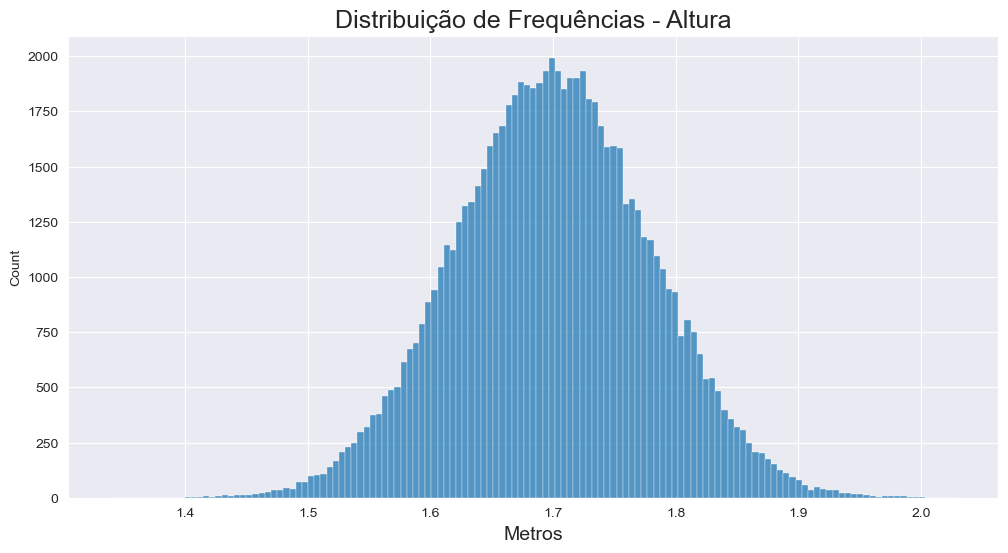

In [ ]:
ax = sns.histplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

plt.show()

<Axes: >

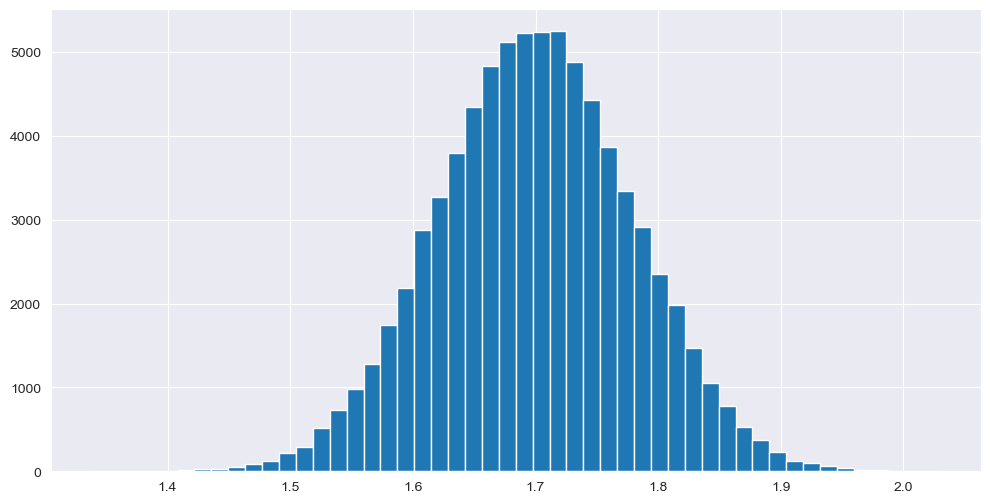

In [ ]:
dados.Altura.hist(bins=50, figsize=(12,6))

<Axes: >

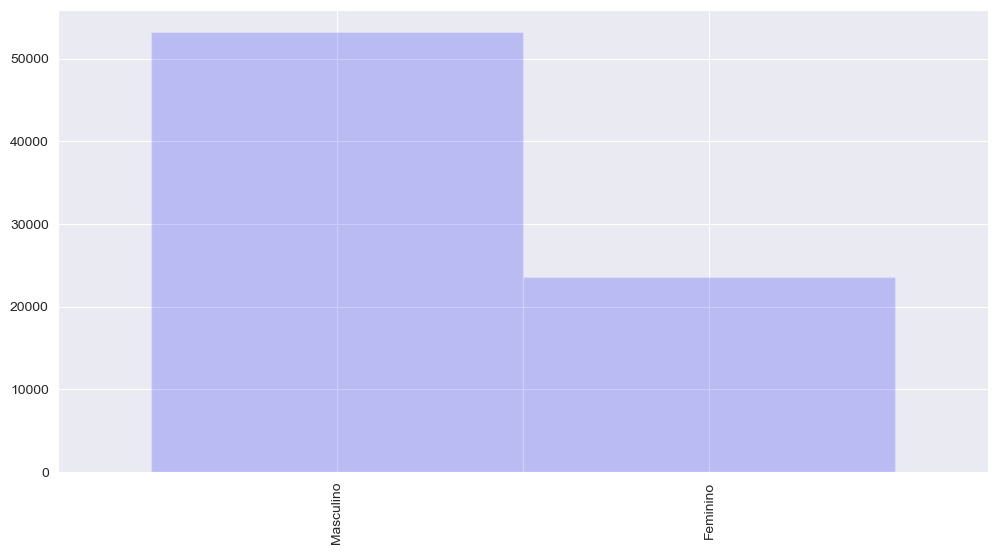

In [ ]:
dist_freq_qualitativas01['Frequência'].plot.bar(width=1,color='blue', alpha = 0.2, figsize=(12,6))

# 2 Medidas de Tendência Central

In [ ]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [ ]:
dados.Renda.median()

1200.0

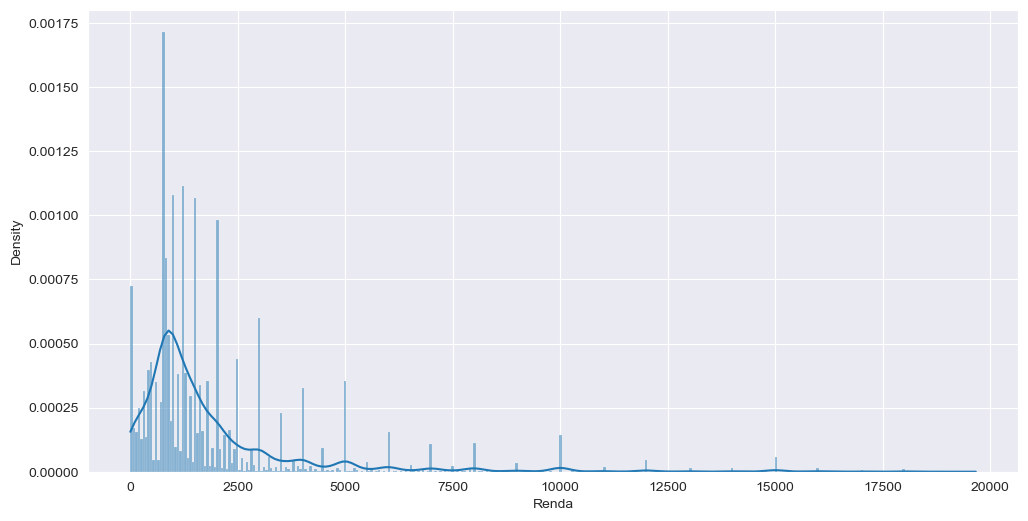

In [ ]:
ax = sns.histplot(dados.query('Renda < 20000').Renda, kde=True, stat='density')
ax.figure.set_size_inches(12,6)
plt.show()

In [ ]:
Moda = dados.Renda.mode()[0]
Moda

788

In [ ]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [ ]:
Media = dados.Renda.mean()
Media

2000.3831988547631

In [ ]:
Moda < Mediana < Media # assimetria a direita

True

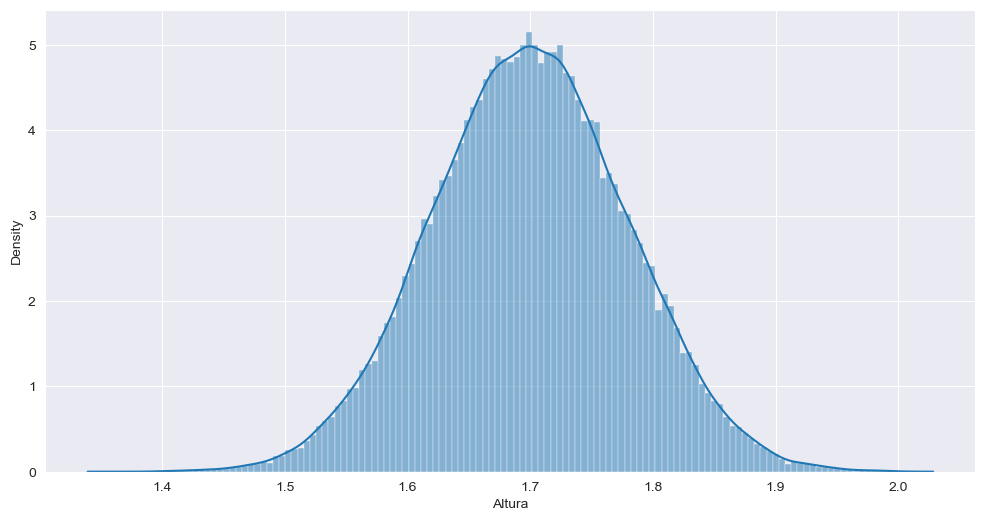

In [ ]:
ax = sns.histplot(dados.Altura, kde=True, stat='density')
ax.figure.set_size_inches(12,6)
plt.show()

In [ ]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [ ]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [ ]:
Media = dados.Altura.mean()
Media

1.6995124540575741

# 3 Projeto Final

In [ ]:
# defina os intervalos das classes em reais

classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()

]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [ ]:
# labels das classes

labels = ['E','D', 'C', 'B', 'A']

In [ ]:
freq = pd.value_counts(
    pd.cut(x=dados.Renda,
           bins=classes,
           labels=labels,
           include_lowest=True)
)
freq

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [ ]:
freq_percentual = pd.value_counts(
    pd.cut(x=dados.Renda,
           bins=classes,
           labels=labels,
           include_lowest=True),
    normalize=True) * 100
freq_percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

In [ ]:
dist_freq_renda = pd.DataFrame(
    {'Frequência':freq,
     'Porcentagem (%)': freq_percentual}

)

dist_freq_renda.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


# 2.1 Desafio

**Qual o percentual de pessoas de nosso dataset ganham um salario minimo (R$ 788,00) ou menos?**

In [ ]:
# utilizando a função percentileofsocore para realizar estas analises


from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')
print('{0:.2f}%'.format(percentual))

28.87%


*Qual o valor máximo ganho por 99% das pessoas de nosso dataset?*

In [ ]:
valor = dados.Renda.quantile(.99)
print('R$ {0:.2f}' .format(valor))

R$ 15000.00


In [ ]:
renda_estat_sexo_estudo = pd.crosstab(dados['Anos de Estudo'],
                                      dados.Sexo,
                                      aggfunc={'mean','median', 'max', 'std'},
                                      values=dados.Renda.round(2))
#renda_estat_sexo_estudo.rename(index=anos, inplace=True)
#renda_estat_sexo_estudo.rename(columns=sexo, inplace=True)
renda_estat_sexo_estudo

max                 mean               median          \
Sexo                 0       1            0            1       0       1   
Anos de Estudo                                                             
1                30000   10000   799.494638   516.201748   700.0   390.0   
2                30000    2000   895.629047   492.771987   788.0   400.0   
3                40000    4000   931.178986   529.911638   788.0   450.0   
4                80000    3500  1109.203862   546.853916   800.0   500.0   
5                50000   10000  1302.329283   704.279111  1000.0   788.0   
6                35000    8000  1338.653218   781.389776  1045.0   788.0   
7                25000    6000  1448.875419   833.732824  1200.0   788.0   
8                40000    9000  1465.497940   830.751004  1200.0   788.0   
9                30000   18000  1639.396667   933.615351  1300.0   800.0   
10               60000   20000  1508.038850   868.021700  1200.0   788.0   
11               45000    6000  1731.270847   925.919225  1218.0   800.0   
12              200000  100000  2117.060504  1286.790889  1500.0  1000.0   
13               30000  120000  2470.330776  1682.313725  1800.0  1200.0   
14               25000   20000  3195.099154  1911.730047  2400.0  1300.0   
15               50000   20000  3706.620269  2226.460457  2500.0  1600.0   
16              200000  100000  6134.279790  3899.513231  4000.0  2800.0   
17                7000    3000  1295.761905   798.174419  1200.0   788.0   

                        std               
Sexo                      0            1  
Anos de Estudo                            
1               1023.904884   639.311534  
2               1331.950552   425.291842  
3               1435.173827   498.234168  
4               2143.800133   424.124446  
5               1419.821787   629.553397  
6               1484.650587   635.782641  
7               1476.628602   574.547028  
8               1419.708673   602.038029  
9               1515.583715   896.781213  
10              2137.664774   973.221652  
11              2078.609734   620.611907  
12              2676.538942  1819.040417  
13              2268.081538  4851.833513  
14              2797.116800  2053.789771  
15              3987.214974  2064.083336  
16              7447.613594  4212.770709  
17               979.648745   459.985964

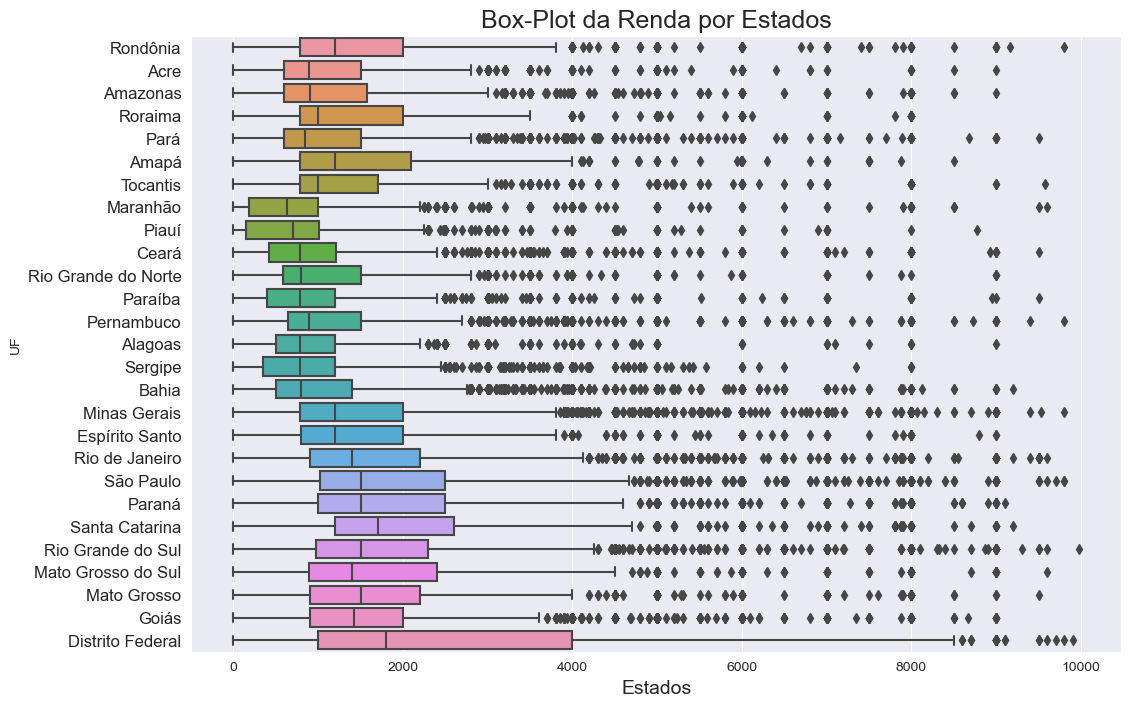

In [ ]:
# construa um boxplot por UF

ax = sns.boxplot(x='Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(12,8)
ax.set_title('Box-Plot da Renda por Estados', fontsize=18)
ax.set_xlabel('Estados', fontsize=14)
ax.set_yticklabels([key for key in uf.values()], fontsize=12)

plt.show()